<a href="https://colab.research.google.com/github/BoonthichaSaejia/Homework_Datacamp_1/blob/master/Day36_Project_VIII_Image_Classification/Day36_Project_VIII_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn.metrics as metrics
import tensorflow as tf
import os, os.path
import pandas as pd
import math

In [3]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 34s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,random_state=10,test_size=0.2)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)
(10000, 1)
(10000, 1)


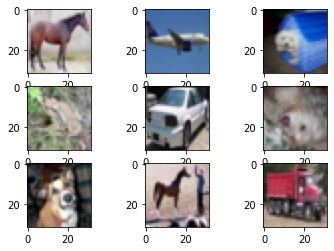

In [8]:
from matplotlib import pyplot as plt

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i])
plt.show()

In [9]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test  = tf.keras.utils.to_categorical(y_test,num_classes=10)
y_valid = tf.keras.utils.to_categorical(y_valid,num_classes=10)

In [10]:
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(40000, 10)
(10000, 10)
(10000, 10)


In [11]:
print(y_train[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
def prep_pixels(train, test, valid):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  valid_norm = valid.astype('float32')
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  valid_norm = valid_norm / 255.0
  return train_norm, test_norm, valid_norm

In [13]:
x_train, x_test, x_valid = prep_pixels(x_train, x_test, x_valid)

In [14]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [56]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
def summarize_diagnostics(history):
  plt.figure(figsize=(20,16))
  plt.subplot(2,1,1)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.subplot(2,1,2)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.show()

In [57]:
model = define_model()
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid,y_valid), verbose=0)


In [58]:
_, acc = model.evaluate(x_valid, y_valid, verbose=0)
print('> %.3f' % (acc * 100.0))


> 57.080


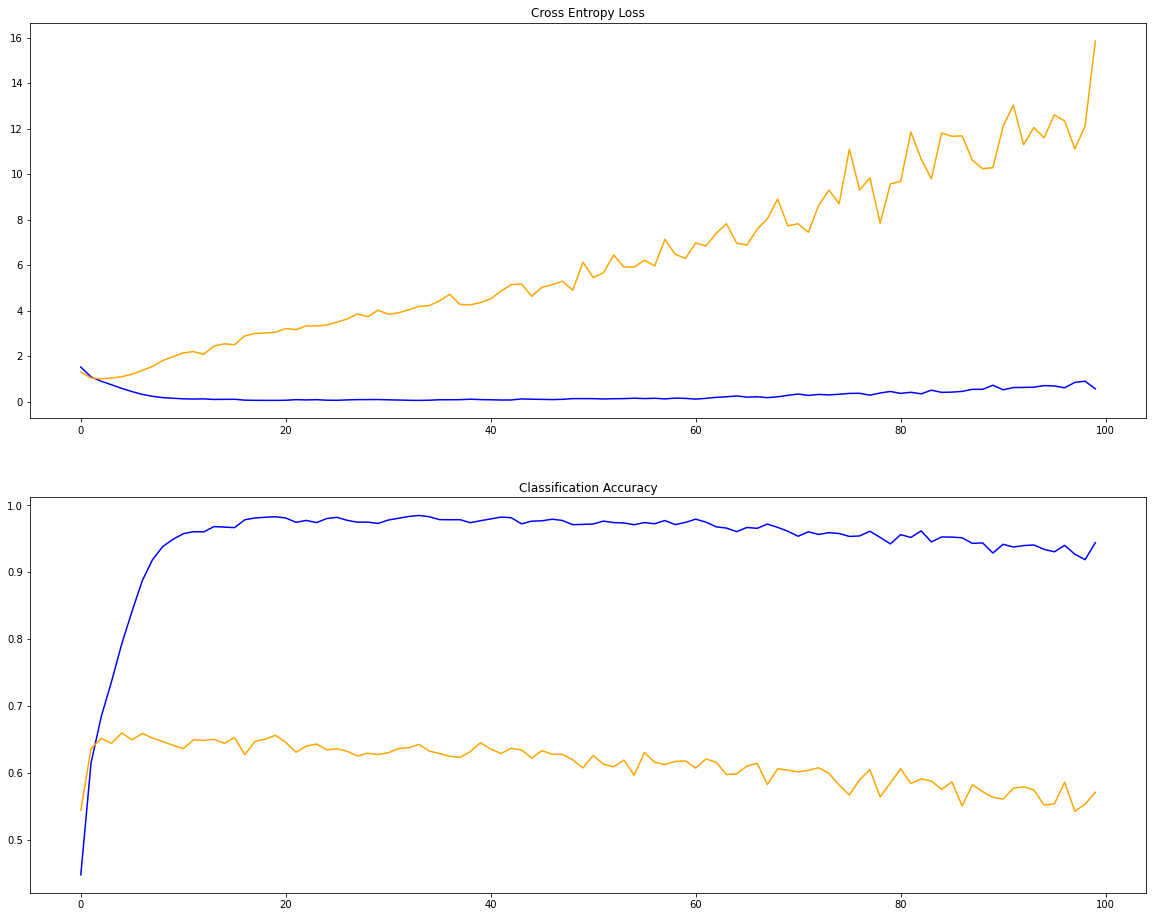

In [59]:
summarize_diagnostics(history)

In [60]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 57.040


In [61]:
predicted=model.predict(x_test)

(array([0]),)

In [62]:
y_pred_cate=[np.argmax(i) for i in predicted]
y_test_cate=[np.argmax(i) for i in y_test]

In [63]:
df_compare=pd.DataFrame(data={'predicted':y_pred_cate,'y_test':y_test_cate})

In [64]:
df_compare['Result']=df_compare.predicted==df_compare.y_test

In [65]:
df_compare

,predicted,y_test,Result
0,5,3,False
1,1,8,False
2,8,8,True
3,0,0,True
4,6,6,True
...,...,...,...
9995,8,8,True
9996,6,3,False
9997,5,5,True
9998,0,1,False


In [66]:
df_compare.Result.value_counts()

True     5704
False    4296
Name: Result, dtype: int64